<a href="https://colab.research.google.com/github/dribnet/clipit/blob/master/demos/palette_enforcement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

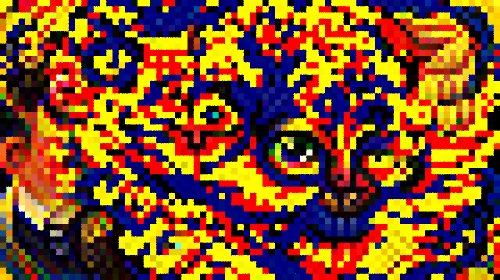<br>
"Face of cat in style of Louis Wain" with the fixed palette

# Pixray palette / smoothness / saturation demo

This notebook by <a href="https://twitter.com/altsoph">altsoph</a> introduced three optional settings: palette enforcement, smoothness, and color saturation.

In [ ]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. For setup,
#@markdown **you need to run this cell,
#@markdown then choose Runtime -> Restart Runtime from the menu,
#@markdown and then run the cell again**. It should remind you to
#@markdown do this after the first run.

#@markdown Setup can take 5-10 minutes, but once it is complete it usually does not need to be repeated
#@markdown until you close the window.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

# https://stackoverflow.com/a/56727659/1010653

# Add a gpu check
# (this can get better over time)
from google.colab import output

nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
  warning_string = f"--> GPU check: ONLY {gpu_memory} MiB available: WARNING, THIS IS PROBABLY NOT ENOUGH <--"
  print(warning_string)
  output.eval_js('alert("Warning - low GPU (see message)")')
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

from IPython.utils import io
with io.capture_output() as captured:
  # this patch applied to fix torchtext dependency 11 Nov 2021
  !pip install torch==1.9.0+cu111 torchtext==0.10.0 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch/ -f https://download.pytorch.org/whl/torchvision/

  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf pixray
  !git clone --branch v1.1 https://github.com/dribnet/pixray
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia==0.6.1
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # pixray deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !git clone https://github.com/pixray/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..

output.clear()
import sys
sys.path.append("pixray")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

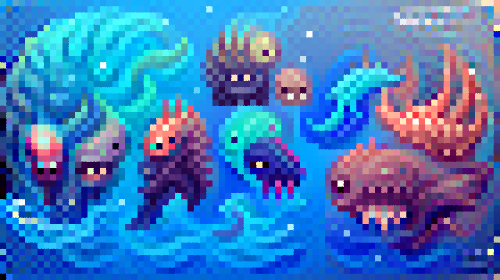

iter: 400, finished (-69=>2.065)


In [ ]:
#@title Settings

#@markdown Enter a description of what you want to draw - I usually add #pixelart to the prompt.
#@markdown If PixelDraw is not used, it will use VQGAN instead.
#@markdown <br>

prompts = "deep ocean monsters #pixelart" #@param {type:"string"}

aspect = "widescreen" #@param ["widescreen", "square"]

do_pixel = True #@param {type:"boolean"}

#@markdown Specify the desired palette ("" for default), here's a few examples:
#@markdown * red     (16 color black to red ramp)
#@markdown * rust\8  (8 color black to rust ramp)
#@markdown * red->rust         (16 color red to rust ramp)
#@markdown * red->#ffff00\20   (20 color red to yellow ramp)
#@markdown * black->red->white (16 color black/red/white ramp)
#@markdown * [#000000, #ff0000, #ffff00, #000080] (four colors)
#@markdown * red->white;blue->yellow (32 colors across two ramps of 16)
#@markdown * red;blue;yellow         (48 colors from combining 3 ramps)
#@markdown * red->yellow;[black]     (16 colors from ramp and also black)
#@markdown * Named colors can be anything in <a target=”_blank” href="https://xkcd.com/color/rgb/">this lookup table</a>

use_palette = "" #@param {type:"string"}
#@markdown Use this flag to encourage smoothess:
smoothness = True #@param {type:"boolean"} 

#@markdown Use this flag to encourage color saturation (use it against color fading):
saturation = True #@param {type:"boolean"} 

#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will save these and start generating images below.

#@markdown When that is done you can change these
#@markdown settings and see if you get different results. Or if you get
#@markdown impatient, just select "Runtime -> Interrupt Execution".
#@markdown Note that the first time you run it may take a bit longer
#@markdown as nessary files are downloaded.


#@markdown
#@markdown *Advanced: you can also edit this cell and add add additional
#@markdown settings, combining settings from different notebooks.*


# Simple setup
import pixray

# these are good settings for pixeldraw
pixray.reset_settings()
pixray.add_settings(prompts=prompts, aspect=aspect)
pixray.add_settings(quality="better", scale=2.5)
pixray.add_settings(display_clear=True)

if do_pixel:
  pixray.add_settings(drawer="pixel")

# palette = None
if use_palette and use_palette!='None':
  pixray.add_settings(target_palette=use_palette)

if smoothness and smoothness!='None':
  pixray.add_settings(smoothness=2.0, smoothness_type='log')

if saturation:
  pixray.add_settings(saturation=1.0)

pixray.add_settings(noise_prompt_seeds=[1,2,3])

#### YOU CAN ADD YOUR OWN CUSTOM SETTING HERE ####
# this is the example of how to run longer with less frequent display
# pixray.add_settings(iterations=500, display_every=50)

settings = pixray.apply_settings()
pixray.do_init(settings)
pixray.do_run(settings)
